In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
trades = pd.read_csv("csv_files/historical_data.csv")
sentiment = pd.read_csv("csv_files/fear_greed.csv")


In [31]:
trades.head()
sentiment.head()
trades.info()
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [32]:
trades["Timestamp_dt"] = pd.to_datetime(trades["Timestamp"], unit="us")
trades["date"] = trades["Timestamp_dt"].dt.date


In [33]:
sentiment["sentiment"] = sentiment["classification"].replace({
    "Extreme Fear": "Fear",
    "Extreme Greed": "Greed"
})

sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date


In [34]:
merged = trades.merge(
    sentiment[["date", "sentiment"]],
    on="date",
    how="inner"
)


In [35]:
merged["is_profitable"] = merged["Closed PnL"] > 0
merged["abs_pnl"] = merged["Closed PnL"].abs()
merged["large_trade"] = merged["Size USD"] > merged["Size USD"].median()


In [36]:
merged.groupby("sentiment")["Closed PnL"].mean()


Series([], Name: Closed PnL, dtype: float64)

In [37]:
merged.groupby("sentiment")["is_profitable"].mean()


Series([], Name: is_profitable, dtype: float64)

In [38]:
merged.groupby("sentiment")["Size USD"].mean()


Series([], Name: Size USD, dtype: float64)

In [39]:
pd.crosstab(
    merged["sentiment"],
    merged["Side"],
    normalize="index"
)


Side
sentiment


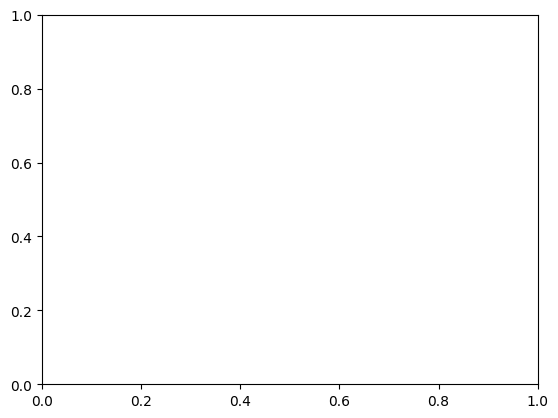

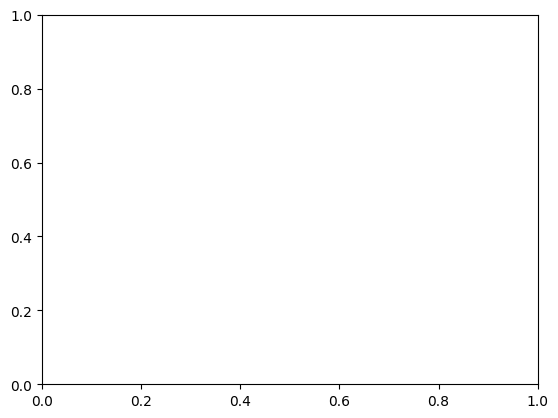

In [40]:
sns.boxplot(x="sentiment", y="Closed PnL", data=merged)
plt.show()

sns.barplot(x="sentiment", y="Size USD", data=merged)
plt.show()


In [41]:
merged = trades.merge(
    sentiment[["date", "sentiment"]],
    on="date",
    how="inner"
)



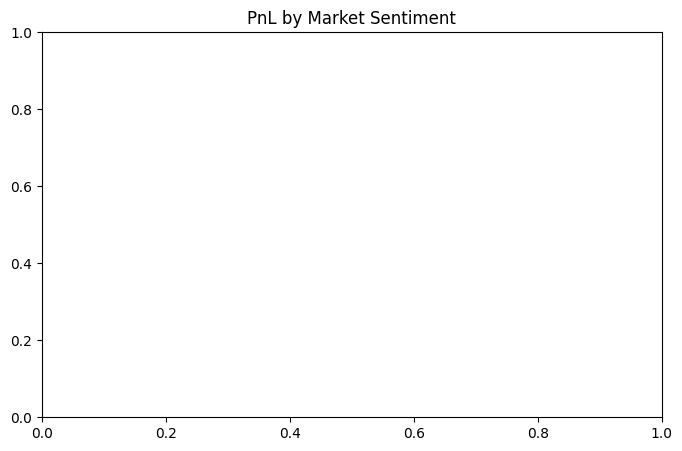

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x="sentiment", y="Closed PnL", data=merged)
plt.title("PnL by Market Sentiment")
plt.savefig("outputs/pnl_by_sentiment.png")
plt.show()


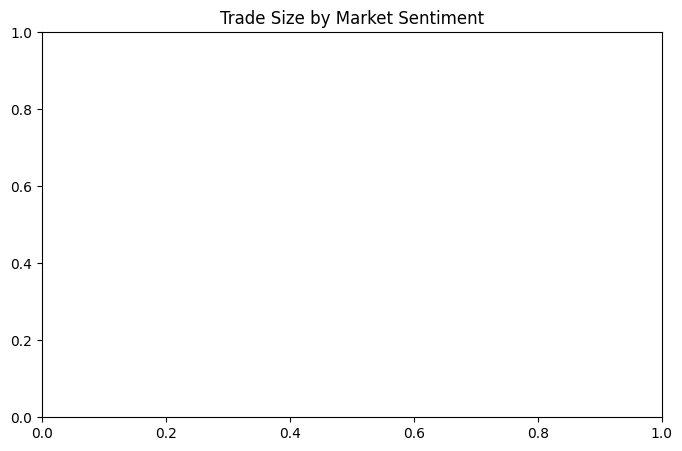

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x="sentiment", y="Size USD", data=merged)
plt.title("Trade Size by Market Sentiment")
plt.savefig("outputs/trade_size_by_sentiment.png")
plt.show()
